In [23]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.utils import np_utils

import tensorflow as tf
import glob

import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data 
from sklearn.preprocessing import OneHotEncoder 


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2

from sklearn import preprocessing

In [24]:
path = []
for img in glob.glob('./data/p2/*'):
    path.append(img)

In [25]:
def display(path):
    
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    #print(im_resized)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()
    
    

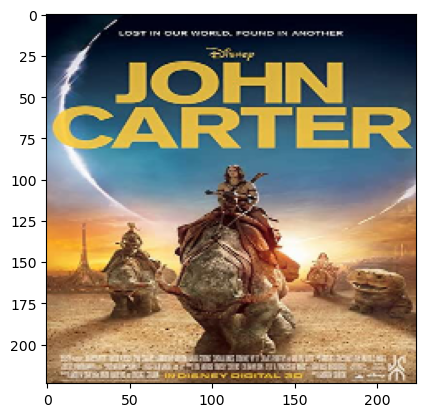

In [26]:

path = "./data/p2/John Carter_imdb,6.6_genre,Adventure.jpg"
display(path)

In [27]:
images = []
genres = []
def readImage():
    for path in glob.glob('./data/p2/*'):
        
        im = cv2.imread(path)
        im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
        #print("appending:--",path)
        images.append(im_resized)
        
        item  = path.split("/")
        movie = item[3].split("_")
        genre = movie[2].split(".")[0].split(",")
        genres.append(genre[1])

In [28]:
readImage()

In [29]:
images[:1]

[array([[[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1]],
 
        [[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1]],
 
        [[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1]],
 
        ...,
 
        [[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1]],
 
        [[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1]],
 
        [[27, 28, 26],
         [27, 28, 26],
         [27, 28, 26],
         ...,
         [ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1]]], dtype=uint8)]

In [32]:
genres[:2]

['Romance', 'Drama']

In [33]:
X = np.array(images).reshape(-1, 224, 224, 3)
X.shape

(2986, 224, 224, 3)

In [37]:
y = np.array(genres)
cat = np.unique(y)

In [38]:
pre = preprocessing.LabelEncoder()
pre.fit(cat)
y = pre.transform(y)
y

array([13,  6,  4, ...,  0,  6,  9])

In [39]:

#Y = np_utils.to_categorical.to_categorical(["a","b"], 2)
Y = np_utils.to_categorical(y, 20)
#Y = keras.utils.to_categorical(y, 20)
print(Y[100])


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)


In [49]:
model=Sequential()

model.add(
    Conv2D(filters=16,
           kernel_size=2,
           padding="same",
           activation="relu",
           input_shape=(224,224,3))
)

In [50]:
model.add(MaxPooling2D(pool_size=2))

In [51]:
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

In [52]:
model.add(Flatten())

In [53]:
#model.add(Dense(500,activation="relu"))
model.add(Dense(120, activation='relu'))      # The first fully connected layer.
model.add(Dense(84, activation='relu')) 
model.add(Dense(20,activation="softmax"))

In [54]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
batch_size = 16
nb_epochs = 10

model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/10
150/150 [==============================] - 18s 117ms/step - loss: 18.1222 - accuracy: 0.1951 - val_loss: 2.4578 - val_accuracy: 0.2358
Epoch 2/10
150/150 [==============================] - 18s 121ms/step - loss: 1.9544 - accuracy: 0.3748 - val_loss: 2.6254 - val_accuracy: 0.2007
Epoch 3/10
150/150 [==============================] - 19s 124ms/step - loss: 1.0470 - accuracy: 0.6893 - val_loss: 3.5012 - val_accuracy: 0.1940
Epoch 4/10
150/150 [==============================] - 18s 121ms/step - loss: 0.4621 - accuracy: 0.8769 - val_loss: 4.1200 - val_accuracy: 0.1773
Epoch 5/10
150/150 [==============================] - 18s 123ms/step - loss: 0.2421 - accuracy: 0.9456 - val_loss: 4.5998 - val_accuracy: 0.1589
Epoch 6/10
150/150 [==============================] - 17s 116ms/step - loss: 0.1449 - accuracy: 0.9715 - val_loss: 5.5099 - val_accuracy: 0.1722
Epoch 7/10
150/150 [==============================] - 17s 114ms/step - loss: 0.1369 - accuracy: 0.9707 - val_loss: 5.7208 - val_a

In [56]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  6.956150054931641
Test accuracy:  0.15551839768886566
